# Data 301 Group 11 Project
## Data Loading and Wrangling Functions

## Data Loading

### Import Package Statements

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Loading data into pd dataframes

In [164]:
StatCanCPI = []
StatCanBCHPI = []
StatCanCanadaHPI = []
CanadaPIR = []
WorldBankData = []
def loadStatCanCPI():
    StatCanCPI = pd.read_csv('./processed/preprocessed/Stat_Can_CPI_1985_to_Now.csv')
    return StatCanCPI
def loadStatCanBCHPIData():
    StatCanBCHPI = pd.read_csv('./processed/preprocessed/Stat_Can_HPI_BC-only_1986_to_2021_May.csv')
    StatCanBCHPI = StatCanBCHPI.drop(index=[1,2],axis=0)
    return StatCanBCHPI
def loadStatCanCanadaHPIData():
    StatCanCanadaHPI = pd.read_csv('./processed/preprocessed/Stat_Can_HPI_Canada_1981_to_2021_May.csv')
    return StatCanCanadaHPI
def loadCanadaPrimeInterestRate():
    CanadaPIR = pd.read_csv('./processed/preprocessed/Canada-Prime-Rate-History.csv')
    CanadaPIR = CanadaPIR.transpose()
    CanadaPIR.columns = CanadaPIR.iloc[0]
    CanadaPIR.drop(index=CanadaPIR.index[0], axis=0, inplace=True)
    return CanadaPIR
def loadWorldBankData():
    WorldBankData = pd.read_csv('./processed/preprocessed/World Bank Data - Indicators.csv')
    return WorldBankData

In [184]:
def loadAll():
    StatCanCPI = loadStatCanCPI()
    StatCanBCHPI = loadStatCanBCHPIData()
    StatCanCanadaHPI = loadStatCanCanadaHPIData()
    CanadaPIR = loadCanadaPrimeInterestRate()
    WorldBankData = loadWorldBankData()
    dataFrames = [StatCanCPI, StatCanBCHPI, CanadaPIR, WorldBankData]
    return dataFrames
ourData = loadAll()

In [189]:
ourData[3]

,Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Unemployment, total (% of total labor force) (...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.510000e+00,7.290000e+00,7.070000e+00,6.910000e+00,6.910000e+00,7.000000e+00,6.340000e+00,5.830000e+00,5.660000e+00,9.480000e+00
1,"Unemployment with advanced education, male (% ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750000e+00,5.730000e+00,5.540000e+00,5.590000e+00,5.600000e+00,5.930000e+00,5.270000e+00,4.790000e+00,4.650000e+00,7.430000e+00
2,"Labor force participation rate, total (% of to...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.641000e+01,6.625000e+01,6.622000e+01,6.576000e+01,6.561000e+01,6.549000e+01,6.559000e+01,6.526000e+01,6.557000e+01,6.391000e+01
3,"Employment to population ratio, ages 15-24, to...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.531000e+01,5.434000e+01,5.506000e+01,5.555000e+01,5.576000e+01,5.538000e+01,5.648000e+01,5.630000e+01,5.747000e+01,4.928000e+01
4,Gross savings (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.085711e+01,2.091795e+01,2.159730e+01,2.214849e+01,1.956936e+01,1.914645e+01,1.984528e+01,1.950003e+01,2.001164e+01,1.871884e+01
5,GDP per capita (current US$),2.259294e+03,2.240433e+03,2.268585e+03,2.374498e+03,2.555111e+03,2.770362e+03,3.047106e+03,3.217159e+03,3.462679e+03,...,5.222370e+04,5.266909e+04,5.263517e+04,5.095600e+04,4.359614e+04,4.231560e+04,4.512936e+04,4.645474e+04,4.632667e+04,4.324162e+04
6,Adjusted net national income (constant 2010 US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.370000e+12,1.390000e+12,1.430000e+12,1.460000e+12,1.430000e+12,1.440000e+12,1.510000e+12,1.540000e+12,1.580000e+12,NaN
7,Export value index (2000 = 100),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.631623e+02,1.647013e+02,1.656868e+02,1.721876e+02,1.482419e+02,1.409860e+02,1.520750e+02,1.629638e+02,1.615493e+02,NaN
8,"Merchandise imports by the reporting economy, ...",7.099567e+00,3.216283e+00,4.465681e+00,3.956761e+00,4.557415e+00,5.804448e+00,7.385699e+00,3.609857e+00,4.818492e+00,...,8.959329e-01,7.490796e-01,7.429469e-01,7.116309e-01,9.661496e-01,7.270159e-01,7.057034e-01,7.222333e-01,7.404451e-01,NaN
9,Population ages 15-64 (% of total population),5.857402e+01,5.844639e+01,5.843289e+01,5.852211e+01,5.869766e+01,5.895580e+01,5.937027e+01,5.991263e+01,6.053933e+01,...,6.913352e+01,6.889938e+01,6.863089e+01,6.831509e+01,6.795488e+01,6.764696e+01,6.728747e+01,6.689774e+01,6.650620e+01,6.612039e+01


<AxesSubplot:xlabel='Date'>

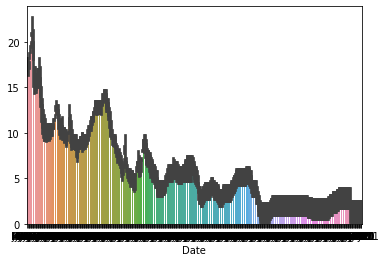

In [188]:
ourData[2]
sns.barplot(data = ourData[2])

(1, 427)
  New housing price indexes  Jan-86  Feb-86  Mar-86  Apr-86  May-86  Jun-86  \
0    Total (house and land)    66.3    66.4    66.4    66.8    67.1    66.9   

   Jul-86  Aug-86  Sep-86  ...  20-Sep  20-Oct  20-Nov  20-Dec  21-Jan  \
0    66.8    66.8    67.2  ...   110.2   111.5   111.8   111.9   112.3   

   21-Feb  21-Mar  21-Apr  21-May  21-Jun  
0   116.3   117.2   118.9   120.0   119.7  

[1 rows x 427 columns]


<AxesSubplot:>

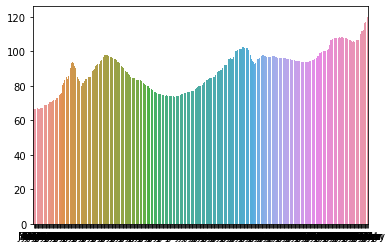

In [168]:
print(StatCanBCHPI.shape)
print(StatCanBCHPI)
sns.barplot(data = StatCanBCHPI)

In [95]:
MasterDataDF = []


In [204]:
ourData[0]

,Products and product groups 4,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,All-items,63.0,65.6,68.5,71.2,74.8,78.4,82.8,84.0,85.6,...,119.9,121.7,122.8,125.2,126.6,128.4,130.4,133.4,136.0,137.0
1,Food 5,65.5,68.8,71.8,73.7,76.5,79.6,83.4,83.1,84.5,...,127.7,130.8,132.4,135.5,140.5,142.6,142.7,145.3,150.2,153.7
2,Shelter 6,65.6,67.5,70.5,73.8,78.1,82.5,86.3,87.9,89.1,...,125.6,127.1,128.7,132.2,133.7,135.8,138.1,140.9,144.5,147.0
3,"Household operations, furnishings and equipment",72.3,74.5,76.7,79.6,82.5,84.2,87.4,87.9,88.7,...,110.9,113.0,114.4,116.6,119.7,121.7,121.9,123.2,123.6,123.8
4,Clothing and footwear,71.5,73.4,76.5,80.5,83.7,86.1,94.3,95.1,96.0,...,91.9,92.0,92.1,93.2,94.6,94.4,93.7,94.5,96.1,94.4
5,Transportation,59.2,61.0,63.3,64.5,67.8,71.6,72.9,74.4,76.8,...,125.6,128.1,129.0,130.4,126.5,127.9,132.9,139.1,141.5,141.2
6,Gasoline,73.5,65.4,68.5,67.9,72.1,82.7,81.5,78.6,77.4,...,177.8,182.3,183.4,183.8,153.4,144.2,161.2,181.5,170.5,146.7
7,Health and personal care,63.2,65.9,69.3,72.3,75.5,79.1,84.7,86.6,88.9,...,117.1,118.7,118.3,119.0,120.5,122.2,124.3,125.9,127.4,129.2
8,"Recreation, education and reading",57.7,60.7,63.7,67.3,70.3,73.2,78.3,79.2,81.1,...,105.3,105.9,106.2,107.4,109.4,111.3,114.0,115.3,116.8,115.7
9,"Alcoholic beverages, tobacco products and recr...",42.8,47.9,51.1,54.9,59.9,65.2,76.4,81.0,82.2,...,135.6,137.6,140.4,146.6,152.0,156.8,161.1,167.9,171.1,171.9


In [220]:
print(StatCanCPI)
ax = sns.barplot(x=0, y=2, data=StatCanCPI)


                        Products and product groups 4  1985  1986  1987  1988  \
0                                           All-items  63.0  65.6  68.5  71.2   
1                                              Food 5  65.5  68.8  71.8  73.7   
2                                           Shelter 6  65.6  67.5  70.5  73.8   
3     Household operations, furnishings and equipment  72.3  74.5  76.7  79.6   
4                               Clothing and footwear  71.5  73.4  76.5  80.5   
5                                      Transportation  59.2  61.0  63.3  64.5   
6                                            Gasoline  73.5  65.4  68.5  67.9   
7                            Health and personal care  63.2  65.9  69.3  72.3   
8                   Recreation, education and reading  57.7  60.7  63.7  67.3   
9   Alcoholic beverages, tobacco products and recr...  42.8  47.9  51.1  54.9   
10              All-items excluding food and energy 7  62.0  65.3  68.3  71.5   
11                       All

AttributeError: 'bool' object has no attribute 'all'